In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!pip install tensorflow==2.1.0

     |████████████████████████████████| 421.8MB 28kB/s 
     |████████████████████████████████| 51kB 7.5MB/s 
     |████████████████████████████████| 450kB 52.5MB/s 
     |████████████████████████████████| 3.9MB 44.9MB/s 
  Created wheel for gast: filename=gast-0.2.2-cp36-none-any.whl size=7542 sha256=ad36c2e3c658e49caa4b5eea5a493061fcc2f9e0e4525ccb0ccaba54dff2df96
  Stored in directory: /root/.cache/pip/wheels/5c/2e/7e/a1d4d4fcebe6c381f378ce7743a3ced3699feb89bcfbdadadd
Successfully built gast
ERROR: tensorflow-probability 0.11.0 has requirement gast>=0.3.2, but you'll have gast 0.2.2 which is incompatible.
  Found existing installation: tensorflow-estimator 2.3.0
    Uninstalling tensorflow-estimator-2.3.0:
      Successfully uninstalled tensorflow-estimator-2.3.0
  Found existing installation: gast 0.3.3
    Uninstalling gast-0.3.3:
      Successfully uninstalled gast-0.3.3
  Found existing installation: tensorboard 2.3.0
    Uninstalling tensorboard-2.3.0:
      Successfully uninsta

In [ ]:
!pip install keras==2.3.1

     |████████████████████████████████| 378kB 4.6MB/s 
  Found existing installation: Keras 2.4.3
    Uninstalling Keras-2.4.3:
      Successfully uninstalled Keras-2.4.3


In [ ]:
import pandas as pd

df2019 = pd.read_excel('drive/My Drive/Colab Data/2019 All Reviews.xlsx', sheet_name='Tracking')
df2020 = pd.read_excel('drive/My Drive/Colab Data/2020 All Reviews.xlsx', sheet_name='Tracking')

In [ ]:
df2019.columns = df2019.iloc[6]
df2019 = df2019.iloc[7:]
df2019 = df2019.reset_index()

df2020.columns = df2020.iloc[6]
df2020 = df2020.iloc[7:]
df2020 = df2020.reset_index()

In [ ]:
df2019 = df2019.loc[df2019.Language.isin(['en'])]
df2019 = df2019[df2019['Review Text'].notnull()]
df2019.shape

(51637, 41)

In [ ]:
df2020 = df2020.loc[df2020.Language.isin(['en'])]
df2020 = df2020[df2020['Review Text'].notnull()]
df2020.shape

(11399, 41)

In [ ]:
#check the date for training data is continuous
print(len(df2019['Published Date'].unique()))
print(len(df2020['Published Date'].unique()))

365
182


In [ ]:
gri2019 = pd.read_excel ('drive/My Drive/Colab Data/2019 GRI.xls', sheet_name='GRI')
gri2020 = pd.read_excel ('drive/My Drive/Colab Data/2020 GRI.xls', sheet_name='GRI')

In [ ]:
gri2019 = gri2019.melt(id_vars=['Establishment'], var_name='Month', value_name='GRI Score')
gri2019 = gri2019.dropna()
gri2019.shape

(2028, 3)

In [ ]:
gri2020 = gri2020.melt(id_vars=['Establishment'], var_name='Month', value_name='GRI Score')
gri2020 = gri2020.dropna()
gri2020.shape

(1083, 3)

In [ ]:
gri2019.head()

,Establishment,Month,GRI Score
0,Ascott Bonifacio Global City Manila,1,Decreased
1,Ascott Central Wuxi,1,Decreased
3,Ascott Guangzhou,1,Decreased
4,Ascott Harmony City Nantong,1,Decreased
5,Ascott Heng Shan Shanghai,1,Decreased


In [ ]:
df2019.columns

Index(['index', 'PMS ID', 'Hotel Name', 'GRI™', 'Reviewer', 'Country',
       'Language', 'Published Date', 'Source', 'Review Rating', 'Rating Scale',
       'Review Score', 'Classification', 'SERVICE', 'SERVICE - Score',
       'CLEANLINESS', 'CLEANLINESS - Score', 'LOCATION', 'LOCATION - Score',
       'VALUE', 'VALUE - Score', 'GASTRONOMY', 'GASTRONOMY - Score', 'ROOM',
       'ROOM - Score', 'DECORATION', 'DECORATION - Score', 'BUSINESS',
       'BUSINESS - Score', 'RECEPTION', 'RECEPTION - Score', 'ENTERTAINMENT',
       'ENTERTAINMENT - Score', 'Department Rating Scale', 'Review Title',
       'Review Text', 'Management Response', 'Replied', 'Tags', 'Cases',
       'Notes'],
      dtype='object', name=6)

**Prepare Training & Validation Dataset**

In [ ]:
df2019['Month'] = pd.DatetimeIndex(df2019['Published Date']).month
df2019 = df2019[['Hotel Name', 'Review Text', 'Month', 'Published Date']]

train = pd.merge(df2019, gri2019, how='left', left_on=['Hotel Name', 'Month'], right_on=['Establishment', 'Month'])
train

,Hotel Name,Review Text,Month,Published Date,Establishment,GRI Score
0,Ascott Bonifacio Global City Manila,Outstanding service Well maintained facilities...,12,31/12/2019,Ascott Bonifacio Global City Manila,Decreased
1,Ascott Bonifacio Global City Manila,"The place was outstanding, way beyond what we'...",12,31/12/2019,Ascott Bonifacio Global City Manila,Decreased
2,Ascott Kuala Lumpur,The best apartment I have ever visited. The st...,12,31/12/2019,Ascott Kuala Lumpur,Decreased
3,Somerset Berlian Jakarta,Too bad AC in living room and bedroom no 2 jus...,12,31/12/2019,Somerset Berlian Jakarta,Increased
4,Somerset Berlian Jakarta,Positive: The pool is awesome.,12,31/12/2019,Somerset Berlian Jakarta,Increased
...,...,...,...,...,...,...
51632,Citadines Mount Sophia Singapore,Positive: The location. Negative: They did not...,1,01/01/2019,Citadines Mount Sophia Singapore,Decreased
51633,Hotel Pravo Hong Kong,Positive: Good location. Negative: The cleanin...,1,01/01/2019,Hotel Pravo Hong Kong,Increased
51634,Citadines Shinjuku Tokyo,Excellent service! May be a little small for 3...,1,01/01/2019,Citadines Shinjuku Tokyo,Increased
51635,Citadines Shinjuku Tokyo,I wish location was better and nearer to the c...,1,01/01/2019,Citadines Shinjuku Tokyo,Increased


In [ ]:
df2020['Month'] = pd.DatetimeIndex(df2020['Published Date']).month
df2020 = df2020[['Hotel Name', 'Review Text', 'Month']]

test = pd.merge(df2020, gri2020, how='left', left_on=['Hotel Name', 'Month'], right_on=['Establishment', 'Month'])
test.shape

(11399, 5)

**Data Exploration**

In [ ]:
train = train[['Review Text', 'GRI Score']]
train.head()

,Review Text,GRI Score
0,Outstanding service Well maintained facilities...,Decreased
1,"The place was outstanding, way beyond what we'...",Decreased
2,The best apartment I have ever visited. The st...,Decreased
3,Too bad AC in living room and bedroom no 2 jus...,Increased
4,Positive: The pool is awesome.,Increased


In [ ]:
test = test[['Review Text', 'GRI Score']]
test.head()

,Review Text,GRI Score
0,"Positive: Friendly staff, very clean and so qu...",Increased
1,Positive: Room service and reception desk neve...,Decreased
2,"Clean and spacious room, good location, so clo...",Increased
3,Positive: If you're looking for somewhere clos...,Decreased
4,New hotel next to airport. With views to airpo...,Decreased


In [ ]:
train['Review Text'][5]

'My family of four stayed at Somerset Ekamai Bangkok for 5 nights for end of year family trip. This is the first time we visited Bangkok and we booked a two bedroom apartment for our stay. The apartment was spacious and clean and we just feel like home. Fridge and washing machine are available for use. There were also a full set of eating utensils and cooking facilities for simple cooking. Staff was friendly and helpful. Although the location is a little bit away from the city centre, the nearest BTS station is at a walking distance of within 10 mins. There is also a Big C supermarket and a number of restaurants in the area. We all had a pleasant and relaxing time during our stay at Somerset Ekamai Bangkok.'

In [ ]:
test['Review Text'][3]

"Positive: If you're looking for somewhere close to the airport, this hotel is well situated. They have a nice reception and guest area upstairs, where people can congregate and relax. The reception staff were friendly and accommodating. Negative: There was a clip from a bandage next to the room door, which looked to have been there for a while, judging by the surrounding dust. There were some minor issues in the room, with holes in the carpet."

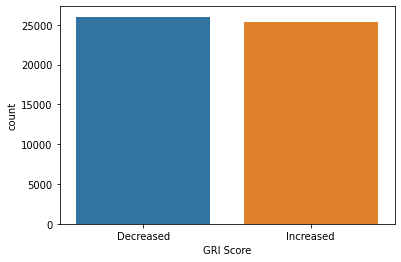

In [ ]:
import seaborn as sns

sns.countplot(x='GRI Score', data=train)

**Data Preprocessing**

In [ ]:
import re

TAG_RE = re.compile(r'<[^>]+>')
def remove_tags(text):
    return TAG_RE.sub('', text)

def preprocess_text(sen):
    sentence = remove_tags(sen)
    
    #remove special tokens Positive and Negative
    sentence = re.sub('Positive:', '', sentence)
    sentence = re.sub('Negative:', '', sentence)
    
    #remove punctuations and numbers
    sentence = re.sub('[^a-zA-Z]', ' ', sentence)
    
    #single character removal
    sentence = re.sub(r"\s+[a-zA-Z]\s+", ' ', sentence)
    
    #remove multiple spaces
    sentence = re.sub(r'\s+', ' ', sentence)
    
    
    return sentence

In [ ]:
x_train = []
sentences = list(train['Review Text'])
for sen in sentences:
    x_train.append(preprocess_text(sen))

In [ ]:
x_train[5]

'My family of four stayed at Somerset Ekamai Bangkok for nights for end of year family trip This is the first time we visited Bangkok and we booked two bedroom apartment for our stay The apartment was spacious and clean and we just feel like home Fridge and washing machine are available for use There were also full set of eating utensils and cooking facilities for simple cooking Staff was friendly and helpful Although the location is little bit away from the city centre the nearest BTS station is at walking distance of within mins There is also Big supermarket and number of restaurants in the area We all had pleasant and relaxing time during our stay at Somerset Ekamai Bangkok '

In [ ]:
x_test = []
sentences2 = list(test['Review Text'])
for sen in sentences2:
    x_test.append(preprocess_text(sen))

In [ ]:
x_test[3]

' If you re looking for somewhere close to the airport this hotel is well situated They have nice reception and guest area upstairs where people can congregate and relax The reception staff were friendly and accommodating There was clip from bandage next to the room door which looked to have been there for while judging by the surrounding dust There were some minor issues in the room with holes in the carpet '

In [ ]:
import numpy as np

y_train = train['GRI Score']
y_train = np.array(list(map(lambda x: 1 if x=='Increased' else 0, y_train)))

In [ ]:
y_test = test['GRI Score']
y_test = np.array(list(map(lambda x: 1 if x=='Increased' else 0, y_test)))

*Embedding layer*

In [ ]:
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers.core import Activation, Dropout, Dense
from keras.layers import Flatten
from keras.layers import GlobalMaxPooling1D
from keras.layers.embeddings import Embedding
from sklearn.model_selection import train_test_split
from keras.preprocessing.text import Tokenizer

Using TensorFlow backend.


In [ ]:
tokenizer = Tokenizer(num_words=50000)
tokenizer.fit_on_texts(x_train)

x_train = tokenizer.texts_to_sequences(x_train)
x_test = tokenizer.texts_to_sequences(x_test)

In [ ]:
#adding 1 for reserved 0 index
vocab_size = len(tokenizer.word_index) + 1

maxlen = int(np.percentile(train['Review Text'].apply(len), 95))
print('max length:', maxlen)

x_train = pad_sequences(x_train, padding='post', maxlen=maxlen)
x_test = pad_sequences(x_test, padding='post', maxlen=maxlen)

max length: 748


**use GLOVE embedding to create feature matrix**

In [ ]:
embeddings_dictionary = dict()
glove_file = open('drive/My Drive/Colab Data/glove.6B.100d.txt', encoding="utf8")

for line in glove_file:
    records = line.split()
    word = records[0]
    vector_dimensions = np.asarray(records[1:], dtype='float32')
    embeddings_dictionary[word] = vector_dimensions
glove_file.close()

In [ ]:
embedding_matrix = np.zeros((vocab_size, 100))
for word, index in tokenizer.word_index.items():
    embedding_vector = embeddings_dictionary.get(word)
    if embedding_vector is not None:
        embedding_matrix[index] = embedding_vector

In [ ]:
embedding_matrix.shape

(25561, 100)

**LSTM Model**

In [ ]:
from keras.layers.recurrent import LSTM

model = Sequential()

embedding_layer = Embedding(vocab_size, 100, weights=[embedding_matrix], input_length=maxlen, trainable=False)
model.add(embedding_layer)
model.add(LSTM(64, recurrent_dropout=0.5))
#model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, 748, 100)          2556100   
_________________________________________________________________
lstm_2 (LSTM)                (None, 64)                42240     
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 65        
Total params: 2,598,405
Trainable params: 42,305
Non-trainable params: 2,556,100
_________________________________________________________________


In [ ]:
history = model.fit(x_train, y_train, batch_size=128, epochs=10, verbose=1, validation_data=(x_test, y_test))

In [ ]:
print("Valuation Accuracy", max(history.history['val_accuracy']))
#print(history.history)

Valuation Accuracy 0.5894376635551453
